<hr>
<h1 style="text-align: center;">Introduction to Aerodynamics and Python</h1>
<hr>

<h3 style="text-align: center;">Nicholas Richmond</h3>
<h3 style="text-align: center;">Student ID: 919578115</h3>
<h3 style="text-align: center;">Project #: 0</h3>
<h3 style="text-align: center;">Date: 10/10/24</h3>

<h3 style="text-align: center;">EAE 127: Applied Aerodynamics</h3>
<h3 style="text-align: center;">University of California, Davis</h3>

<hr>

<hr>

# **Local Software Environment Setup Acknowledgment**

I, Nicholas Richmond, acknowledge that I have downloaded and successfully setup Python, Anaconda, and my desired IDE on my working machine for this course prior to the submission of this assignment. 

10/10/24

<hr>


Setup plotting presets and imports:

In [2]:
#STANDARD IMPORTS
import numpy as np #type: ignore
import os
import matplotlib.pyplot as plt #type: ignore
### JUPYTER NOTEBOOK SETTINGS ########################################
#Plot all figures in full-size cells, no scroll bars
%matplotlib inline
#Disable Python Warning Output
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')
### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package #type: ignore
#No Background fill, legend font scale, frame on legend
sns.set_theme(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#restore default matplotlib colormap
mplcolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(mplcolors)

#Get color cycle for manual colors
colors = sns.color_palette()
#SET MATPLOTLIB DEFAULTS
#(call after seaborn, which changes some defaults)
params = {
#FONT SIZES
'axes.labelsize' : 30, #Axis Labels
'axes.titlesize' : 30, #Title
'font.size' : 28, #Textbox
'xtick.labelsize': 22, #Axis tick labels
'ytick.labelsize': 22, #Axis tick labels
'legend.fontsize': 24, #Legend font size
'font.family' : 'serif',
'font.fantasy' : 'xkcd',
'font.sans-serif': 'Helvetica',
'font.monospace' : 'Courier',
#AXIS PROPERTIES
'axes.titlepad' : 2*6.0, #title spacing from axis
'axes.grid' : True, #grid on plot
'figure.figsize' : (8,8), #square plots
'savefig.bbox' : 'tight', #reduce whitespace in saved figures
#LEGEND PROPERTIES
'legend.framealpha' : 0.5,
'legend.fancybox' : True,
'legend.frameon' : True,
'legend.numpoints' : 1,
'legend.scatterpoints' : 1,
'legend.borderpad' : 0.1,
'legend.borderaxespad' : 0.1,
'legend.handletextpad' : 0.2,
'legend.handlelength' : 1.0,
'legend.labelspacing' : 0,
}
import matplotlib #type:ignore
matplotlib.rcParams.update(params) #update matplotlib defaults, call after￿
### END OF BOILERPLATE ##################################################
colors = sns.color_palette() #color cycle

<hr>

## Problem 1: Boundary Layers and Numeric Integration
***1.1: Turbulent Boundary Layer Velocity Profile***

For this part of the problem, the goal is to calculate and plot the horizontal velocity distribution in the vertical direction for both a Laminar and a Turbulent boundary layer. 

The velocity profile for laminar and turbulent layers is given by the following:
**Laminar Boundary Layer Velocity Profile** 
$$ \frac{u}{u_e} \approx \left[ 2 \left( \frac{y}{\delta} \right) - \left( \frac{y}{\delta} \right)^2 \right] $$

**Turbulent Boundary Layer Velocity Profile** 
$$ \frac{u}{u_e} \approx \left( \frac{y}{\delta} \right)^{\dfrac{1}{7}} $$

where $\frac{y}{\delta}$ is the vertical coordinate in the boundary layer at some x-location non-dimensionalized by the physical boundary layer thickness at that x-location and $\frac{u}{u_{e}}$ is the velocity in the x-direction non-dimensionalized by the x-velocity of the flow at the edge of the boundary
layer (where y = d). 

<hr>

In [5]:
# Initialize x and y variables
ynon = np.linspace(0,1,201) #creates an array of 200 numbers evenly ranging from 0 to 1

unonL = 2*(ynon)-(ynon)**2 #Laminar boundary layer velocity distribution
unonT = ynon**(1/7) #Turbulent boundary layer velocity distribution

Re = 1e8

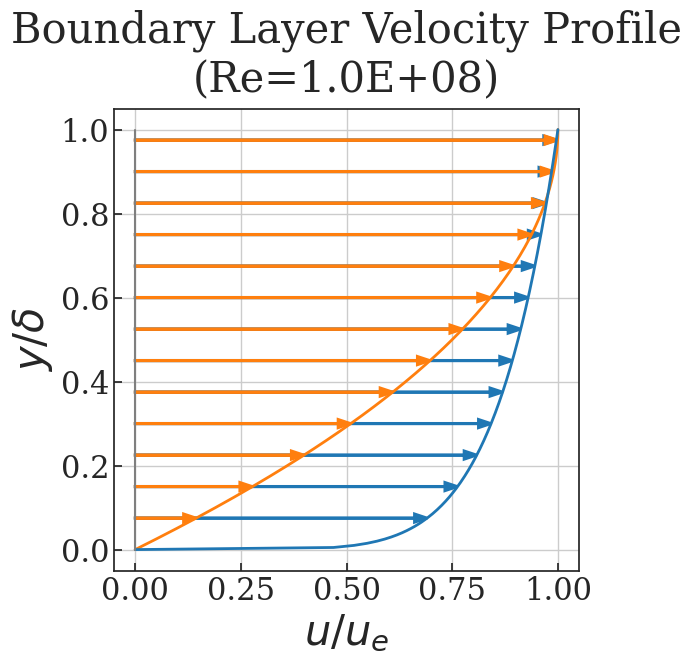

In [6]:
# Plot distribution for a visual representation. Non-dimensional y is on the vertical axis for a more intuitive plot TODO: add legend

plt.figure(figsize=(6,6))
plt.title('Boundary Layer Velocity Profile\n(Re={:1.1E})'.format(Re)) 
plt.xlabel("$u/u_e$") #Label x axis (dollar signs are for number formatting using LaTeX)
plt.ylabel("$y / \\delta$") #Label y axis
line = 2 #linewidth

plt.plot(unonL,ynon,color=colors[1],linewidth = line) #plot laminar boundary layer profile
plt.plot(unonT,ynon,color=colors[0],linewidth = line) #plot turbulent boundary layer profile

vertzeroline = np.zeros(len(ynon))

plt.plot(vertzeroline,ynon,color=colors[7]) #plot a vertical reference line at u/ue = 0

#Add arrows:
wd,ln = 0.02,0.03
for i in range(0, len(ynon), 15):
    if abs(unonT[i]) < ln:
        plt.plot([0, unonT[i]], [ynon[i], ynon[i]], color=colors[0],linewidth=line)
    else:
        plt.arrow(0, ynon[i], unonT[i]-ln, 0, head_width=wd, head_length=ln, fc=colors[0], ec=colors[0], linewidth=line)


for i in range(0, len(ynon), 15):
    if abs(unonL[i]) < ln:
        plt.plot([0, unonL[i]], [ynon[i], ynon[i]], color=colors[1],linewidth=line)
    else:
        plt.arrow(0, ynon[i], unonL[i]-ln, 0, head_width=wd, head_length=ln, fc=colors[1], ec=colors[1], linewidth=line)

plt.show()

<hr>

***1.2: Boundary Layer Thickness***

For this part, the goal is to calculate the boundary layer displacement thickness, $\delta^*$.

To do this, we first need to know the boundary layer thickness $\delta$ and the specific conditions that the boundary layer is subjected to. These conditions are given as x = $300$ ft aft of a 747 nose at a Reynolds number of $1\times10^8$.

The non-dimensional displacement thickness $\delta^*\over\delta$ can be found with the following equation:

$${\delta^*\over\delta} = \int_{0}^{1} (1 - \frac{u}{u_{e}})d\frac{y}{\delta} $$

In this equation, $\frac{u}{u_{e}}$ is the same non-dimensionalized velocity profile at the edge of the boudary layer we found in part 1.1. Therefore, if we can calculate $\delta$ then we can re-dimensionalize $\delta^*$. Fortunately, the following equation is valid for turbulent flow and is thus applicable: 

**Turbulent Boundary Layer Thickness for a Flat Plate:**
$$ \delta(x) = \frac{ 0.16 x}{ (Re_x)^{ \tfrac{1}{7} } }$$


In [7]:
#Calculate Displacement thickness and boundary layer thickness
Re = 1e8
L = 300

#non-dim. displacement thickness
delta_star_non = np.trapz(1 - unonT, ynon) #integrate vel. profile according to eqn above
#dimensional boundary layer thicknes at aft [ft]
delta = L * 0.16 / (Re ** (1 / 7)) #Blausius turbulent flat plate BL thickness eqn
#re-dimensionalize disp. thickness
delta_star = delta_star_non * delta
print('|------------------------------------------------------------------|')
print('|Displacement Thickness: {} in (Re={:1.1E}, L={})|'.format(delta_star*12, Re, L) )
print('|------------------------------------------------------------------|')
print('BL Thickness: {} in'.format(delta*12) )

|------------------------------------------------------------------|
|Displacement Thickness: 5.219319208243424 in (Re=1.0E+08, L=300)|
|------------------------------------------------------------------|
BL Thickness: 41.45389476486636 in


As seen above, the displacement thickness at x = 300ft aft of the nose of a Boeing 747 with a Reynolds number of $1\times10^8$:

$$\delta^*\approx5.22\text{ in}$$

This means that the potential flow streamline is deflected 5.22 inches away from the surface of the fuselage at this location.

<hr>

## Problem 2: Airfoil Plotting and Line Integrals
***2.1: Airfoil Plotting***

The goal of this problem is to practice plotting airfoils from files using three different airfoil geometries. Two of the airfoils I have chosen are from Boeing aircraft (Boeing 737, Boeing B-29), and one is from a Lockheed C-141. 

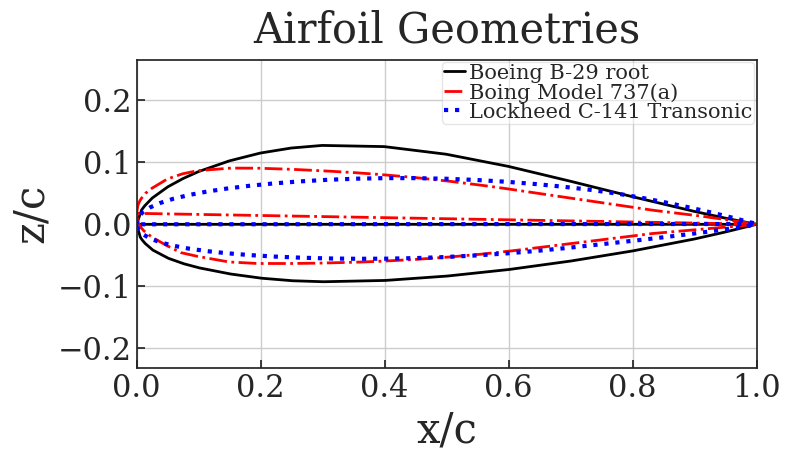

In [8]:
#Load the three airfols and plot them
import os.path #allows filepaths to be added on both mac and windows

folder = "airfoil_info"

filename = os.path.join(folder,"b29root.txt")
xb29, zb29 = np.loadtxt(filename, skiprows = 2, unpack = True) #x and z coordinates of 2412 airfoil

filename = os.path.join(folder,"b737a.txt")
xb737a, zb737a = np.loadtxt(filename, skiprows = 2, unpack = True) #x and z coordinates of 23012 airfoil

filename = os.path.join(folder, "c141a.txt")
xc141a, zc141a = np.loadtxt(filename, skiprows = 2, unpack = True) #x and z coordinates of 611 airfoil

#Start Figure (figsize sets aspect ratio, make it skinny for an airfoil)
plt.figure(figsize=(8,4))
plt.title('Airfoil Geometries') #Set title of figure
plt.xlabel("x/c") #Label x axis (non-dimensional x)
plt.ylabel("z/c") #Label y axis (non-dimensional z)

#Plot Airfoil Data
plt.rc('legend',fontsize=15) #change legend size to accomodate large titles

plt.plot(xb29, zb29, label="Boeing B-29 root", color='black', linestyle="-", linewidth=2, markersize=8)
plt.plot(xb737a, zb737a, label="Boing Model 737(a)", color='red', linestyle="-.", linewidth=2, markersize=4)
plt.plot(xc141a, zc141a, label="Lockheed C-141 Transonic", color='blue', linestyle=":", linewidth=3, markersize=2)
plt.grid(True) #Plot a grid
#Force Axis to have equal scale (VERY important for geometry plots)
plt.axis('equal') #************************************************************
plt.xlim([0, 1]) #Lock x-axis to airfoil
#Plot Legend located in 'best' space
plt.legend(loc='best')


<hr>

## Problem 3: Airfoil Surface Pressure and Numeric Differentiation
***3.1: Airfoil Surface Pressure***

We are given the surface pressure distribution for the upper and lower sections of a NACA 2412 airfoil in a file. The goal of this section is to practice plotting from a .csv file. 

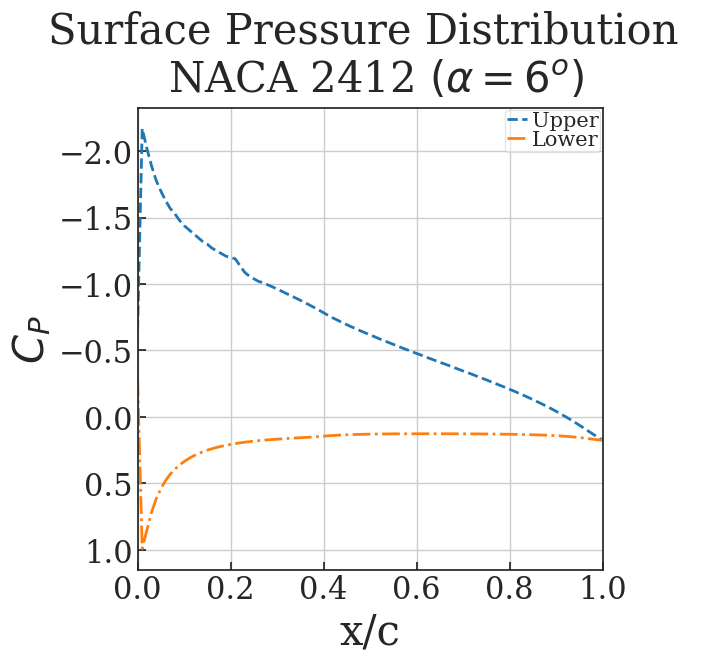

In [9]:
filename = os.path.join(folder,'naca2412_SurfPress_a6.csv')
x, Cpl, Cpu = np.loadtxt(filename, skiprows = 1, unpack=True,delimiter=',')
plt.figure(figsize=(6,6))
plt.title('Surface Pressure Distribution \n NACA 2412 $(\\alpha=6^o)$')
plt.xlabel("x/c") #Label x axis (non-dimensional x)
plt.ylabel("$C_P$") #Label y axis Pressure coefficient
plt.gca().invert_yaxis()

plt.plot(x, Cpu, label='Upper', linewidth=2, linestyle='--')
plt.plot(x, Cpl, label='Lower', linewidth=2, linestyle='-.')
plt.grid(True) #Plot a grid
plt.xlim([0, 1]) #Lock x-axis to airfoil
plt.legend(loc='best') #Legend

The above plot has the y-axis (coefficent of pressure) reversed because the upper edge of the wing has a negative $C_p$ and the lower edge of the wing has a positive $C_p$. By inverting the y-axis, the $C_p$ corresponding to the upper edge is above the one corresponding to the lower edge, which visually is more intuitive.
<hr>

***3.2: Surface Pressure Gradient and Numeric Differentiation***

In this part the goal is to find and plot the pressure gradient of the data from the previous problem using first order, forward differentiation.

$$ \left({\partial C_p\over\partial{x\over c}}\right)_i = {{C_{p,i+1} - C_{p,i}}\over{\left({x}\over c\right)_{i+1}}-\left({x\over c}\right)_i} $$

This can be plotted:

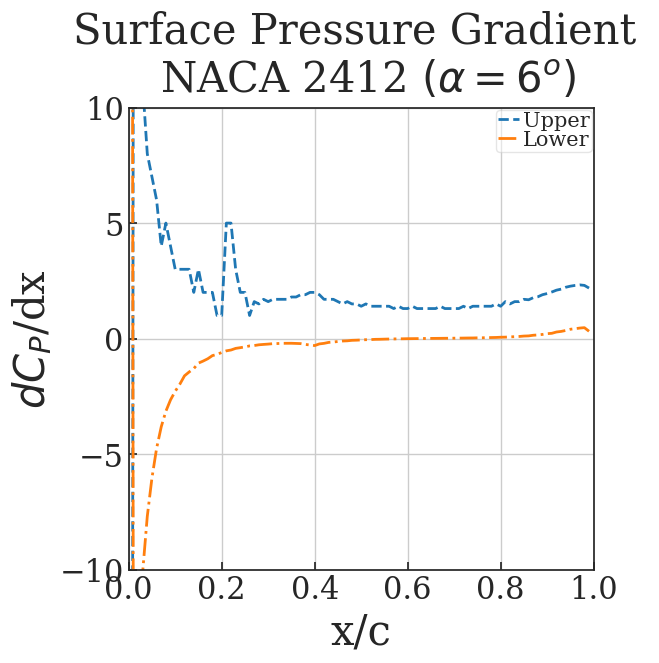

In [10]:
#plot the pressure gradient for NACA 2412 upper and lower edges

dCpudx = np.zeros(len(Cpu) - 1) #forward difference so one less point
dCpldx = np.zeros(len(Cpl) - 1)
for i in range(len(dCpudx)):
    dCpudx[i] = (Cpu[i+1] - Cpu[i]) / (x[i+1] - x[i]) #slope equation
    dCpldx[i] = (Cpl[i+1] - Cpl[i]) / (x[i+1] - x[i])
#Plot Pressure Gradient
plt.figure(figsize=(6,6))
plt.title('Surface Pressure Gradient \n NACA 2412 $(\\alpha=6^o)$')
plt.xlabel("x/c") #Label x axis (non-dimensional x)
plt.ylabel("$dC_P$/dx") #Label y axis Pressure coefficient
#Plot Airfoil Data
plt.plot(x[:-1], dCpudx, label='Upper', linewidth=2, linestyle='--')
plt.plot(x[:-1], dCpldx, label='Lower', linewidth=2, linestyle='-.')
plt.grid(True) #Plot a grid
plt.xlim([0, 1]) #Lock x-axis to airfoil
plt.ylim([-10, 10]) #Limit bounds to see smaller results
plt.legend(loc='best') #Legend

This plot shows the changes in pressure along the airfoil, with the most prominent change at the leading edge.
<hr>

## Problem 4: Linear Algebra

The goal of this problem is to become familiar with using numpy to help solve systems of linear equations. Numpy has a built in function to do just this. 

This section will be focused on solving a system of three of linear equations and printing the results.


In [11]:
#solve the system of equations using numpy's linear algebra solver

#set up the A matrix
A = np.array([
    [1, 2, 3, 4],
    [3, 2,-2, 3],
    [0, 1, 1, 0],
    [2, 1, 1,-2]
])

#set up the b matrix
b = np.array([12, 10, -1, -5])

#solve the system
soln = np.linalg.solve(A,b)

print("A Matrix: \n{}\n".format(A))
print("b Matrix: \n{}\n".format(b))

for var, val in zip('wxyz', soln): #loop through letters in string and list
    print('{} = {:1.6f}'.format(var, val))

A Matrix: 
[[ 1  2  3  4]
 [ 3  2 -2  3]
 [ 0  1  1  0]
 [ 2  1  1 -2]]

b Matrix: 
[12 10 -1 -5]

w = 1.153846
x = -1.230769
y = 0.230769
z = 3.153846


<hr>

## Problem 5: Lift Curves and Linear Interpolation
***5.1: Lift Curves***

This section focuses on plotting lift curve and drag curves. Lift cuves plot coefficient of lift for an airfoil, $C_l$, against angel of attack, $\alpha$. Similarly, drag curves plot coefficient of drag for an airfoil, $C_d$, against angle of attack.

For this example, I have chosen to use the airfoils NACA0015 (symmetric) and NACA2412 (cambered) at a Reynolds number of 200,000. The first step in this analysis is to plot the geometries of the two airfoils, similar to part 2.1.

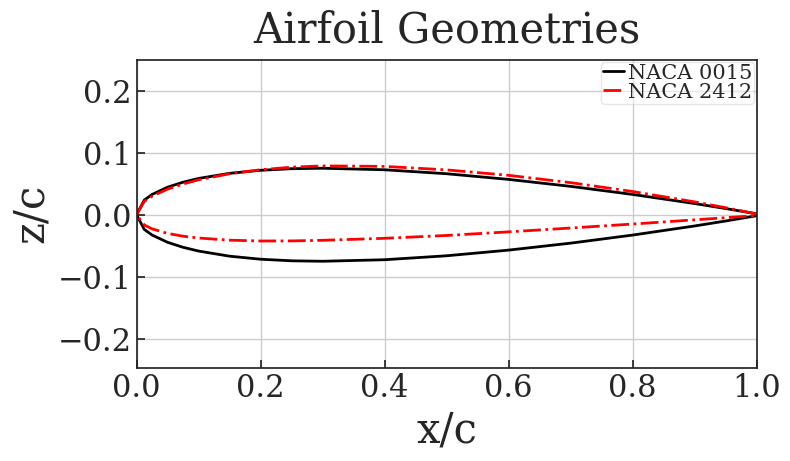

In [12]:
#Code for plotting geometries:

filename = os.path.join(folder,"naca0015.txt")
xn0015, zn0015 = np.loadtxt(filename, skiprows = 1, unpack = True)

filename = os.path.join(folder,"naca2412.txt")
xn2412, zn2412 = np.loadtxt(filename, skiprows = 1, unpack = True)

plt.figure(figsize=(8,4))
plt.title('Airfoil Geometries') #Set title of figure
plt.xlabel("x/c") #Label x axis (non-dimensional x)
plt.ylabel("z/c") #Label y axis (non-dimensional z)

#Plot Airfoil Data
plt.rc('legend',fontsize=15) #change legend size to accomodate large titles

plt.plot(xn0015, zn0015, label="NACA 0015", color='black', linestyle="-", linewidth=2, markersize=8)
plt.plot(xn2412, zn2412, label="NACA 2412", color='red', linestyle="-.", linewidth=2, markersize=4)

plt.grid(True) #Plot a grid
#Force Axis to have equal scale (VERY important for geometry plots)
plt.axis('equal')
plt.xlim([0, 1]) #Lock x-axis to airfoil
#Plot Legend located in 'best' space
plt.legend(loc='best')



The above plots display the geometries of the two airfoils overlayed upon one another. The NACA 0015 airfoil is symmetric about the ${z\over c} = 0$ line and the NACA 2412 airfoil is slightly cambered. As will be seen with the lift curves, this will cause the cambered airfoil to produce a positive coefficient of lift even while the angle of attack is 0.
<hr>

The next step in analyzing these airfoils is to examine their lift and drag curves, which are plotted below. 

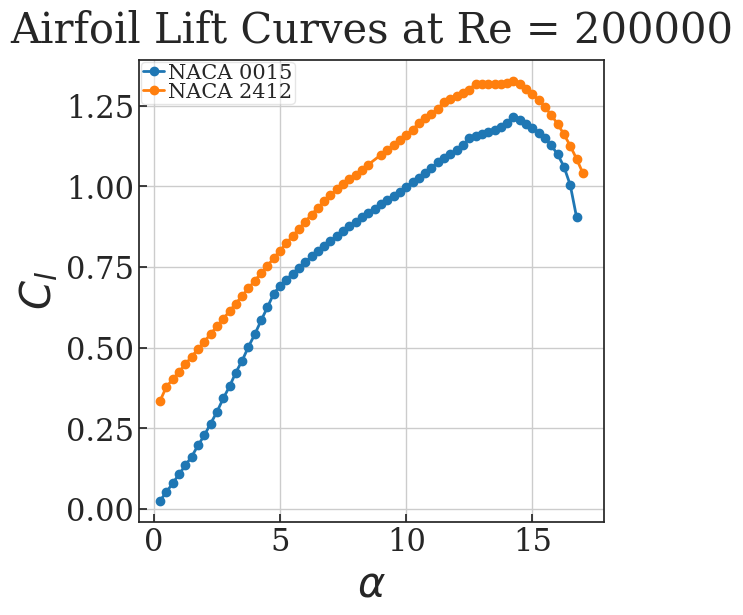

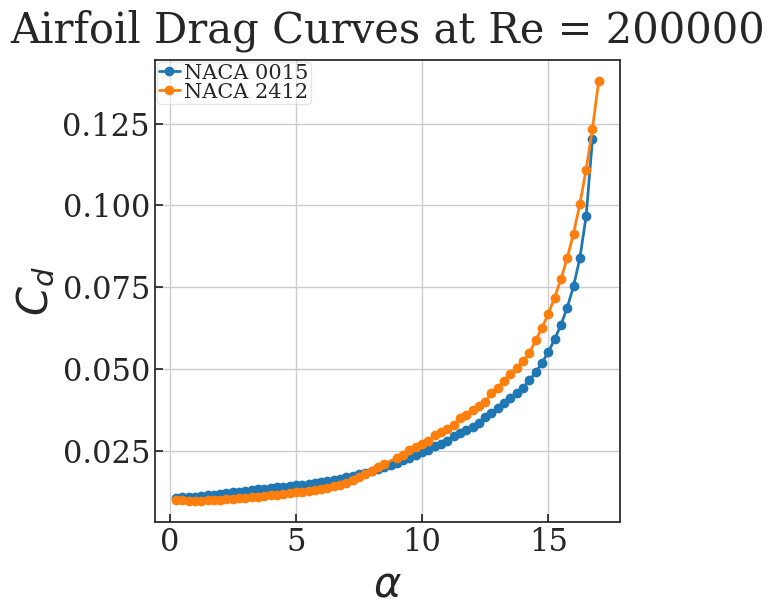

In [13]:
#plot Cl vs alpha for both airfoils

filename = os.path.join(folder,"xf-naca0015-il-200000.csv")
Alpha, Cl, Cd, Cdp, Cm, Top_Xtr, Bot_Xtr = np.loadtxt(filename, skiprows = 11, unpack=True, delimiter=',') #information for NACA 0015

#create a new array that only contains the positive alpha values and their corresponding Cl values for NACA 0015
posAlpha0015 = []
posCl0015 = []
posCd0015 = []
for i in range(0,len(Alpha)):
    if Alpha[i] > 0:
        posAlpha0015.append(Alpha[i])
        posCl0015.append(Cl[i])
        posCd0015.append(Cd[i])
posAlpha0015 = np.array(posAlpha0015)
posCl0015 = np.array(posCl0015)
posCd0015 = np.array(posCd0015)

filename = os.path.join(folder,"xf-naca2412-il-200000.csv")
Alpha, Cl, Cd, Cdp, Cm, Top_Xtr, Bot_Xtr = np.loadtxt(filename, skiprows = 11, unpack=True, delimiter=',') #information for NACA 2412

posAlpha2412 = []
posCl2412 = []
posCd2412 = []
for i in range(0,len(Alpha)):
    if Alpha[i] > 0:
        posAlpha2412.append(Alpha[i])
        posCl2412.append(Cl[i])
        posCd2412.append(Cd[i])
posAlpha2412 = np.array(posAlpha2412)
posCl2412 = np.array(posCl2412)
posCd2412 = np.array(posCd2412)

#figure for lift curves
plt.figure(figsize=(6,6))
plt.title("Airfoil Lift Curves at Re = 200000")
plt.xlabel("$\\alpha$")
plt.ylabel("$C_l$")
plt.plot(posAlpha0015, posCl0015, label = 'NACA 0015', marker = 'o', color = colors[0],linewidth = line) #NACA 0015 lift curve plot
plt.plot(posAlpha2412, posCl2412, label = 'NACA 2412', marker = 'o', color = colors[1], linewidth = line) #NACA 2412 lift curve plot
plt.legend(loc="best")

#figure for drag curves
plt.figure(figsize=(6,6))
plt.title("Airfoil Drag Curves at Re = 200000")
plt.xlabel("$\\alpha$")
plt.ylabel("$C_d$")
plt.plot(posAlpha0015, posCd0015, label = 'NACA 0015', marker = 'o', color = colors[0],linewidth = line) #NACA 0015 drag curve plot
plt.plot(posAlpha2412, posCd2412, label = 'NACA 2412', marker = 'o', color = colors[1], linewidth = line) #NACA 2412 drag curve plot
plt.legend(loc="best")


The most noteable difference is that the NACA 0015 lift curve passes through the origin, which means that when the angle of attack is zero, the lift is also zero. As stated above, this contrasts with the cambered NACA 2412 airfoil, which has a positive coefficent of lift when the angle of attack is zero. Otherwise, the profiles are very similar and have nearly the same stall angle, although the maximum coefficient of lift is slightly higher the NACA 2412 airfoil.

Their drag curves are nearly identical, and rise in a parabolic mannar where the lowest coefficient of drag is at an angle of attack of zero.

<hr>

***5.2: Linear Interpolation***
In this section, the goal is to interpolate the data between two points to determine the coefficient of lift ($C_l$) for both airfoils at $\alpha = 0.35\degree$ and $\alpha = 10.1\degree$. Since neither of these two points are directly provided in the data sets, numpy's linear interpolation function will be used.


In [23]:
#Linear interpolation

naca0015a036 = np.interp(0.36,posAlpha0015,posCl0015)
naca0015a101 = np.interp(10.1,posAlpha0015,posCl0015)

naca2412a036 = np.interp(0.36,posAlpha2412,posCl2412)
naca2412a101 = np.interp(10.1,posAlpha2412,posCl2412)

print("NACA 0015 Coefficient of Lift at Angle of Attack = 0.38 degrees: {}".format(naca0015a036))
print("NACA 0015 Coefficient of Lift at Angle of Attack = 10.1 degrees: {}".format(naca0015a101))
print("NACA 2412 Coefficient of Lift at Angle of Attack = 0.38 degrees: {}".format(naca2412a036))
print("NACA 2412 Coefficient of Lift at Angle of Attack = 10.1 degrees: {}".format(naca2412a101))

NACA 0015 Coefficient of Lift at Angle of Attack = 0.38 degrees: 0.038148
NACA 0015 Coefficient of Lift at Angle of Attack = 10.1 degrees: 1.00434
NACA 2412 Coefficient of Lift at Angle of Attack = 0.38 degrees: 0.355128
NACA 2412 Coefficient of Lift at Angle of Attack = 10.1 degrees: 1.16692


The output of the above code displays the coefficients of lift $C_l$ at a few different angles of attack $\alpha$. These angles are not directly in the dataset and had to be interpolated.
<hr>

***5.3: Maximum Lift Calculation***

The final part of this problem is to find the maximum lift possible at the given conditions using one of the above airfoils at one of the above specified angles of attack. I will be using the NACA 2412 airfoil at an angle of attack of $\alpha = 10.3\degree$, assuming sea level conditions.

In [ ]:
#Maximum lift

Vinf = 180 #m/s
S = 200 #ft^2

S = S*0.092903 #convert to m^2
rho = 1.225 #kg/m^3

